# ITI104 - Machine Learning Algorithms
# Assignment 1 - Voting and Stacking Ensembles
# Main: Digits datset - Multiclass classification
# Includes written commentary of results

In [78]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [79]:
data = load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [80]:
df.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
target         int32
Length: 65, dtype: object

In [81]:
df.target.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [82]:
df.target.value_counts(normalize=True)

3    0.101836
5    0.101280
1    0.101280
6    0.100723
4    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
Name: target, dtype: float64

# Stratified split

In [83]:
feature_cols = [x for x in df.columns if x != 'target']

# Create the generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['target']))

# Create the training and test sets
x_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'target']

x_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'target']

In [84]:
y_train.value_counts()
y_train.value_counts(normalize=True)

3    0.101601
1    0.101601
6    0.100905
5    0.100905
4    0.100905
9    0.100209
7    0.099513
2    0.098817
0    0.098817
8    0.096729
Name: target, dtype: float64

In [85]:
y_test.value_counts()
y_test.value_counts(normalize=True)

5    0.102778
3    0.102778
9    0.100000
7    0.100000
6    0.100000
4    0.100000
1    0.100000
0    0.100000
8    0.097222
2    0.097222
Name: target, dtype: float64

# Useful functions

In [86]:
cols_to_scale = data.feature_names

In [87]:
predict_summary_df = pd.DataFrame(dtype='float')

In [88]:
#FOR STANDARD

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

def full_results(name, classifier):
    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)
    
    global predict_summary_df

    #Type of classifier
    print(classifier)
    print()
    
    #APPEND RESULTS FOR COMPARISON OF MODELS
    #APPEND1
    score_summary.append(measure_error(y_test, y_test_pred, name))
    
    #APPEND2
    try:
        #This is for binary classification only
        y_probs = classifier.predict_proba(x_test)
        df1 = pd.DataFrame(np.round(y_probs,4), columns = ['Prob(y=0)', 'Prob(y=1)'])
        df2 = pd.DataFrame(y_test_pred, columns = ['Predict'])
        df3 = pd.concat([df1, df2], axis=1)
        header = [name]*3
        df3.columns = pd.MultiIndex.from_tuples(list(zip(header, df3.columns)))
        global predict_summary_df
        predict_summary_df = pd.concat([predict_summary_df, df3], axis = 1)
        
    except:
        df2 = pd.DataFrame(y_test_pred, columns = ['Predict'])
        header = [name]
        df2.columns = pd.MultiIndex.from_tuples(list(zip(header, df2.columns)))
        predict_summary_df = pd.concat([predict_summary_df, df2], axis = 1)
        
    #Train and test set error comparison
    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                       measure_error(y_test, y_test_pred, 'test')],
                                       axis=1)
    print(train_test_full_error)
    print()

    #Classification Report
    print(classification_report(y_test, y_test_pred))
    print()

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    #labels = ['False', 'True']
    #ax.set_xticklabels(labels);
    #ax.set_yticklabels(labels);
    ax.set_ylabel('Actual');
    ax.set_xlabel('Predicted');
    plt.show()
    
    #AUC
    try:
        y_probs = classifier.predict_proba(x_test)[:, 1] 
        print('AUC =', roc_auc_score(y_test, y_probs))
        fpr, tpr, threshold = roc_curve(y_test, y_probs)
        plt.plot(fpr,tpr,'o-')
        plt.xlabel('False Postive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    except:
        pass
    
    #Feature importance
    try:
        feature_imp = pd.Series(classifier._final_estimator.feature_importances_, index=data.feature_names).sort_values(ascending=False)
        fig = plt.figure()
        ax = feature_imp.plot(kind='bar')
        ax.set(ylabel='Relative Importance');
    except:
        pass
    
    #Trees
    try:
        print('The total number of trees are', len(classifier._final_estimator.estimators_))
        max = 0
        for tree_in_forest in classifier._final_estimator.estimators_:
            if max < 4:
                plot_tree(tree_in_forest, filled=True)
                plt.show()
                max += 1
    except:
        pass
    
    print('-'*90)
    print()
    print()

In [89]:
pipe_logisticregression = Pipeline([('scaler', MinMaxScaler()), ('logisticregression', LogisticRegression(multi_class = 'multinomial', max_iter=5000, random_state=100))])
pipe_svm = Pipeline([('scaler', MinMaxScaler()), ('svm', svm.SVC(probability=True,random_state=100))])
pipe_kneighbors = Pipeline([('scaler', MinMaxScaler()), ('kneighbors', KNeighborsClassifier())])
pipe_decisiontree = Pipeline([('scaler', MinMaxScaler()), ('decisiontree', DecisionTreeClassifier(class_weight='balanced',random_state=100))])
pipe_bagging = Pipeline([('scaler', MinMaxScaler()), ('bagging', BaggingClassifier(random_state=100))])
pipe_adaboost = Pipeline([('scaler', MinMaxScaler()), ('adaboost', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features=4,random_state=100)))])
pipe_gradientboosting = Pipeline([('scaler', MinMaxScaler()), ('gradientboosting', GradientBoostingClassifier(random_state=100))])
pipe_randomforest = Pipeline([('scaler', MinMaxScaler()), ('randomforest', RandomForestClassifier(random_state=100))])

estimators = [('logisticregression', pipe_logisticregression),
              ('svm', pipe_svm),
             ('kneighbors', pipe_kneighbors),
             ('decisiontree', pipe_decisiontree),
             ('bagging', pipe_bagging),
             ('adaboost', pipe_adaboost),
             ('gradientboosting', pipe_gradientboosting),
             ('randomforest', pipe_randomforest)]

logisticregression
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, multi_class='multinomial',
                                    random_state=100))])

              train      test
accuracy   0.987474  0.961111
precision  0.987610  0.961649
recall     0.987474  0.961111
f1         0.987496  0.960934

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.92      1.00      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      0.94      0.96        36
           7       0.97      1.00      0.99        36
           8       0.91      0.89      0.90        35
           9       1.00      0.92      0.96        36

    accuracy   

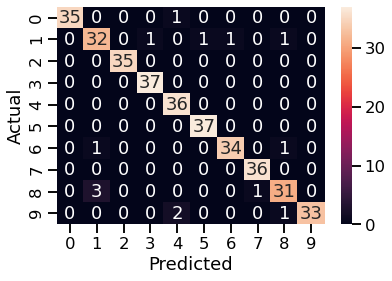

------------------------------------------------------------------------------------------


svm
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm', SVC(probability=True, random_state=100))])

              train      test
accuracy   0.997912  0.991667
precision  0.997912  0.992034
recall     0.997912  0.991667
f1         0.997910  0.991660

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99 

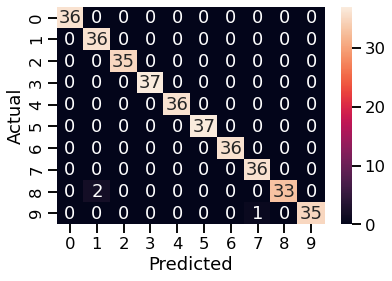

------------------------------------------------------------------------------------------


kneighbors
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kneighbors', KNeighborsClassifier())])

              train      test
accuracy   0.991649  0.983333
precision  0.991700  0.983612
recall     0.991649  0.983333
f1         0.991634  0.983247

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98    

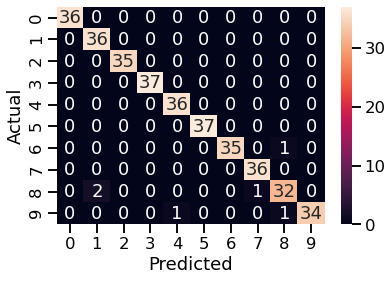

------------------------------------------------------------------------------------------


decisiontree
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('decisiontree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=100))])

           train      test
accuracy     1.0  0.841667
precision    1.0  0.841538
recall       1.0  0.841667
f1           1.0  0.840419

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.77      0.75      0.76        36
           2       0.81      0.86      0.83        35
           3       0.86      0.81      0.83        37
           4       0.91      0.83      0.87        36
           5       0.90      0.97      0.94        37
           6       0.86      0.86      0.86        36
           7       0.80      0.89      0.84        36
           8       0.73      0.69      0.71        35
           9 

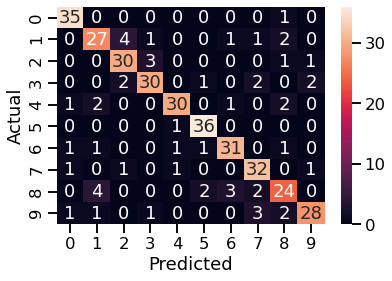

------------------------------------------------------------------------------------------


bagging
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('bagging', BaggingClassifier(random_state=100))])

              train      test
accuracy   0.999304  0.908333
precision  0.999309  0.910089
recall     0.999304  0.908333
f1         0.999304  0.906661

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.82      0.89      0.85        36
           2       0.94      0.91      0.93        35
           3       0.90      0.97      0.94        37
           4       0.87      0.94      0.91        36
           5       0.92      0.97      0.95        37
           6       0.97      0.94      0.96        36
           7       0.90      0.97      0.93        36
           8       0.92      0.69      0.79        35
           9       0.91      0.83      0.87        36

    accuracy                           0

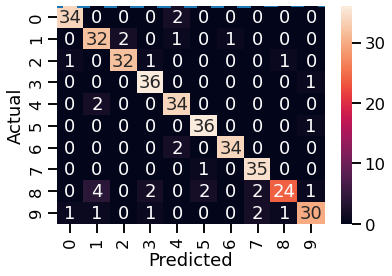

The total number of trees are 10
------------------------------------------------------------------------------------------


adaboost
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                          max_features=4,
                                                                          random_state=100)))])

              train      test
accuracy   0.726514  0.719444
precision  0.805133  0.785714
recall     0.726514  0.719444
f1         0.737850  0.721561

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        36
           1       0.79      0.31      0.44        36
           2       0.80      0.69      0.74        35
           3       0.84      0.73      0.78        37
           4       0.76      0.81      0.78        36
           5       0.84      0.86      0.8

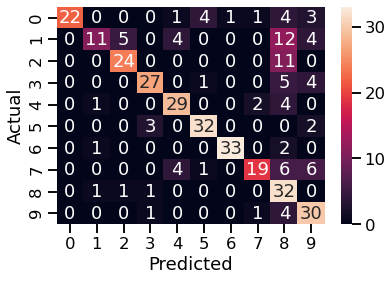

The total number of trees are 50
------------------------------------------------------------------------------------------


gradientboosting
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('gradientboosting',
                 GradientBoostingClassifier(random_state=100))])

           train      test
accuracy     1.0  0.955556
precision    1.0  0.956058
recall       1.0  0.955556
f1           1.0  0.955334

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.94      0.86      0.90        36
           2       1.00      0.97      0.99        35
           3       0.97      1.00      0.99        37
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.99        37
           6       0.97      0.94      0.96        36
           7       0.92      1.00      0.96        36
           8       0.89      0.91      0.90        35
           9       0.94      0.92

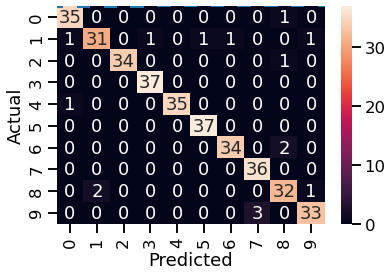

The total number of trees are 100
------------------------------------------------------------------------------------------


randomforest
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('randomforest', RandomForestClassifier(random_state=100))])

           train      test
accuracy     1.0  0.972222
precision    1.0  0.972967
recall       1.0  0.972222
f1           1.0  0.972036

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.92      1.00      0.96        36
           2       1.00      0.97      0.99        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.95      1.00      0.97        36
           8       0.94      0.89      0.91        35
           9       1.00      0.92      0.96        36

    ac

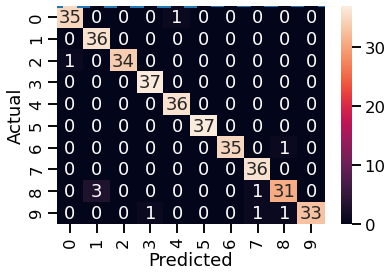

The total number of trees are 100
------------------------------------------------------------------------------------------




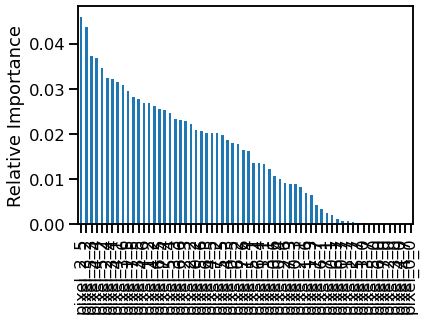

In [90]:
score_summary = []

for i, j in estimators:
    print(i)
    j.fit(x_train, y_train)
    full_results(i,j)

# Stacking

StackingClassifier(cv=5,
                   estimators=[('logisticregression',
                                Pipeline(steps=[('scaler', MinMaxScaler()),
                                                ('logisticregression',
                                                 LogisticRegression(max_iter=5000,
                                                                    multi_class='multinomial',
                                                                    random_state=100))])),
                               ('svm',
                                Pipeline(steps=[('scaler', MinMaxScaler()),
                                                ('svm',
                                                 SVC(probability=True,
                                                     random_state=100))])),
                               ('kneighbors',
                                Pipeline(steps=[('scaler', MinMaxSc...
                                                 AdaBoostClassifier(ba

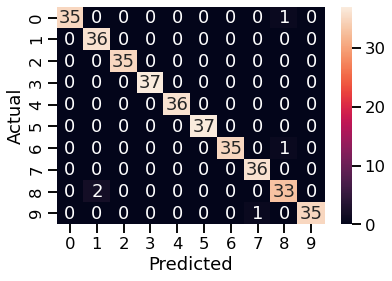

------------------------------------------------------------------------------------------




In [91]:
stacking = StackingClassifier(cv = 5, estimators=estimators, final_estimator=LogisticRegression())
stacking = stacking.fit(x_train, y_train)
full_results('stacking', stacking)

# Voting (Soft)

VotingClassifier(estimators=[('logisticregression',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=5000,
                                                                  multi_class='multinomial',
                                                                  random_state=100))])),
                             ('svm',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('svm',
                                               SVC(probability=True,
                                                   random_state=100))])),
                             ('kneighbors',
                              Pipeline(steps=[('scaler', MinMaxScaler())...
                                               AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=

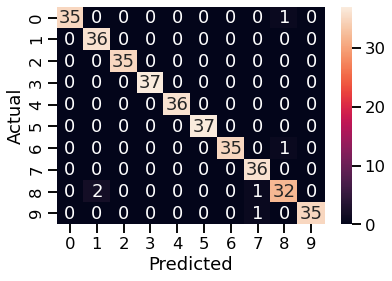

------------------------------------------------------------------------------------------




In [92]:
voting_soft = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_soft = voting_soft.fit(x_train, y_train)
full_results('voting_soft', voting_soft)

# Voting (Hard)

VotingClassifier(estimators=[('logisticregression',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=5000,
                                                                  multi_class='multinomial',
                                                                  random_state=100))])),
                             ('svm',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('svm',
                                               SVC(probability=True,
                                                   random_state=100))])),
                             ('kneighbors',
                              Pipeline(steps=[('scaler', MinMaxScaler())...
                                               AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=

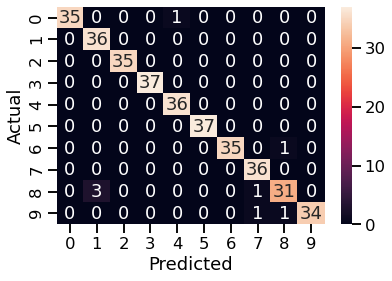

------------------------------------------------------------------------------------------




In [93]:
voting_hard = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_hard = voting_hard.fit(x_train, y_train)
full_results('voting_hard', voting_hard)

# Summary

In [94]:
score_summary_df = pd.Series(dtype='float')

for i in score_summary:
    score_summary_df = pd.concat([score_summary_df, i], axis = 1)

score_summary_df.T.drop([0])

,accuracy,precision,recall,f1
logisticregression,0.961111,0.961649,0.961111,0.960934
svm,0.991667,0.992034,0.991667,0.991660
kneighbors,0.983333,0.983612,0.983333,0.983247
decisiontree,0.841667,0.841538,0.841667,0.840419
bagging,0.908333,0.910089,0.908333,0.906661
adaboost,0.719444,0.785714,0.719444,0.721561
gradientboosting,0.955556,0.956058,0.955556,0.955334
randomforest,0.972222,0.972967,0.972222,0.972036
stacking,0.986111,0.986479,0.986111,0.986147
voting_soft,0.983333,0.983755,0.983333,0.983324


## Qn: Compare the performance between the Voting and Stacking ensembles, as well as the performance of the ensembles and their respective base estimators.

### The best-performing base estimator is Support Vector Machine with a test accuracy of 0.991667. Among the base estimators, the Decision Tree and Adaboost estimators are below 0.9 in test accuracy, at 0.841667 and 0.719444 respectively. 

### None of the heterogenous ensemble methods outperforms SVM as an individual estimator. It appears that in this scenario, the ensembles have a top-performing model and the ensembles is not able to effectively harness the contribution of other base classifiers. 

### This toy dataset is relatively small, and perhaps it is relatively easy to make a classification based on the features, which may be reasons why indidual base estimators are performing well standalone. Thus ensemble methods may not be able to "value-add" much more and did not push test accuracies much higher. 

### Among the ensemble methods, stacking produced a marginally better test accuracy at 0.986111, versus voting_soft at 0.983333 and voting_hard at 0.977778. In this case, using a meta classifier as the final predictor gave slightly better results, leaving the stacking classifier to decide on the relative importance of the base classifiers.

### We take the results with a pinch of salt, noting from the below "Extra checks" section of the notebook that the difference in test predictions for the ensemble methods is only by a handful of test data points. 

# Extra checks

In [95]:
predict_summary_df['actual','actual'] = pd.Series(y_test).reset_index(drop=True)
predict_summary_df

,logisticregression,svm,kneighbors,decisiontree,bagging,adaboost,gradientboosting,randomforest,stacking,voting_soft,voting_hard,actual
,Predict,Predict,Predict,Predict,Predict,Predict,Predict,Predict,Predict,Predict,Predict,actual
0,5,5,5,5,5,5,5,5,5,5,5,5
1,2,2,2,2,2,2,2,2,2,2,2,2
2,8,8,8,8,8,8,8,8,8,8,8,8
3,6,1,1,1,1,8,1,1,1,1,1,1
4,7,7,7,7,7,9,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
355,4,4,4,4,4,4,4,4,4,4,4,4
356,2,2,2,2,2,2,2,2,2,2,2,2
357,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
df5 = predict_summary_df.loc[:,[('stacking','Predict'), ('voting_soft','Predict'), ('voting_hard','Predict'),('actual','actual')]]
df5

,stacking,voting_soft,voting_hard,actual
,Predict,Predict,Predict,actual
0,5,5,5,5
1,2,2,2,2
2,8,8,8,8
3,1,1,1,1
4,7,7,7,7
...,...,...,...,...
355,4,4,4,4
356,2,2,2,2
357,0,0,0,0


In [97]:
df5['Compare', 'Predict'] = 'Same'

for i,j in df5.iterrows():
    if j[0] == j[1] == j[2] == j[3]:
        pass
    else:
        df5.loc[i, ('Compare', 'Predict')] = 'Different'
        
df5

,stacking,voting_soft,voting_hard,actual,Compare
,Predict,Predict,Predict,actual,Predict
0,5,5,5,5,Same
1,2,2,2,2,Same
2,8,8,8,8,Same
3,1,1,1,1,Same
4,7,7,7,7,Same
...,...,...,...,...,...
355,4,4,4,4,Same
356,2,2,2,2,Same
357,0,0,0,0,Same


In [98]:
df5.loc[df5['Compare', 'Predict'] == 'Different']

,stacking,voting_soft,voting_hard,actual,Compare
,Predict,Predict,Predict,actual,Predict
36,8,8,8,6,Different
51,1,1,1,8,Different
76,8,8,7,8,Different
93,7,7,7,9,Different
101,9,9,8,9,Different
127,1,1,1,8,Different
140,8,8,4,0,Different
233,8,8,1,8,Different
276,8,7,8,8,Different
